In [53]:
import spacy
import en_core_web_sm
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
nlp = en_core_web_sm.load()

In [17]:
df = pd.read_csv('data/augmented_data.csv')
df

,Text Command,Topic,Identifier,Action,One Hot Encoded Topic,One Hot Encoded Action,Verb/Noun
0,assign completed status to X,Task,X,Completed,"[1,0]","[0,0,0,0,1]",assign
1,move X to completed,Task,X,Completed,"[1,0]","[0,0,0,0,1]",move
2,X completed,Task,X,Completed,"[1,0]","[0,0,0,0,1]",completed
3,Completed X,Task,X,Completed,"[1,0]","[0,0,0,0,1]",completed
4,X in progress,Task,X,In Progress,"[1,0]","[0,1,0,0,0]",in progress
...,...,...,...,...,...,...,...
3718,Project X happening schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3719,Project X on-duty schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3720,Project X on duty schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3721,Project X on agenda,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED


In [38]:
identifier_pos = pd.DataFrame(columns = ['Text Command', 'Identifier', 'Tag Start', 'Tag End'])

In [39]:
for i in range(len(df.index)):
    
    sentence = nlp(df.loc[i][0])
    identifier = df.loc[i][2]
    last_word = nlp('Start of Sentence')
    for token in last_word:
        last_word = token
    tag_end = None
    for token in sentence:
        if token.text == identifier:
            tag_start = last_word.tag_
        if last_word.text == identifier:
            tag_end = token.tag_
        last_word = token
    if tag_end == None:
        tag_end = 'End of Sentence'
    identifier_pos.loc[i] = [df.loc[i][0], df.loc[i][2], tag_start, tag_end]


In [40]:
identifier_pos

,Text Command,Identifier,Tag Start,Tag End
0,assign completed status to X,X,IN,End of Sentence
1,move X to completed,X,VB,IN
2,X completed,X,NN,VBD
3,Completed X,X,VBN,End of Sentence
4,X in progress,X,NN,IN
...,...,...,...,...
3718,Project X happening schedule,X,NN,VBG
3719,Project X on-duty schedule,X,NN,IN
3720,Project X on duty schedule,X,NN,IN
3721,Project X on agenda,X,NN,IN


In [47]:
tag_start_dict = dict()
tag_end_dict = dict()
tag_combo_dict = dict()
for i in range(len(identifier_pos.index)):
    tag_start = identifier_pos.loc[i][2]
    tag_end = identifier_pos.loc[i][3]
    tag_combo = tag_start + '-' + tag_end
    if tag_start_dict.get(tag_start,0) == 0:
        tag_start_dict[tag_start] = 1
    else:
        tag_start_dict[tag_start] += 1
    if tag_end_dict.get(tag_end,0) == 0:
        tag_end_dict[tag_end] = 1
    else:
        tag_end_dict[tag_end] += 1
    if tag_combo_dict.get(tag_combo,0) == 0:
        tag_combo_dict[tag_combo] = 1
    else:
        tag_combo_dict[tag_combo] += 1
    
    

In [54]:
sorted_combo_tag_dict = {k: v for k, v in sorted(tag_combo_dict.items(), key=lambda item: item[1],reverse=True) if v>=100}

<BarContainer object of 9 artists>

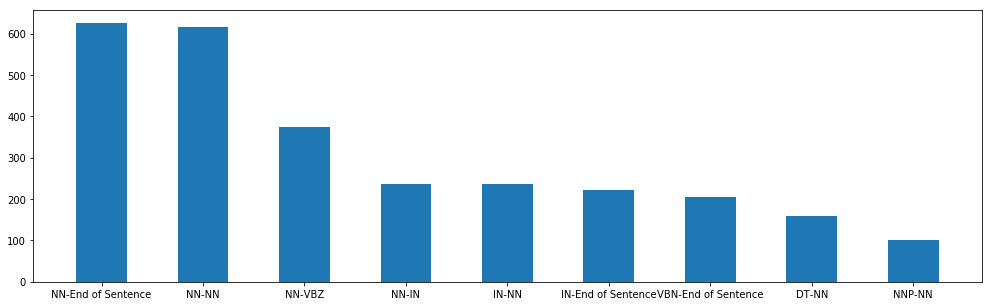

In [62]:
plt.figure(figsize=(17,5))
plt.bar(list(sorted_combo_tag_dict.keys()),list(sorted_combo_tag_dict.values()),width=0.5)